# Loading Library

In [ ]:
!pip install geemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.7 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
import os
import ee

# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize(project='thesiselian')


In [ ]:
!pip install tornado==4.5.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.7/483.7 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tornado: filename=tornado-4.5.2-cp310-cp310-linux_x86_64.whl size=427306 sha256=132cc0f213e28ff405a35a19374985c888b30dd0de0a57628674b4b41b10be65
  Stored in directory: /root/.cache/pip/wheels/00/65/47/430d96669f31f97c8b388052f6e528c22913872fc86d1a0821
Successfully built tornado
  Attempting uninstall: tornado
    Found existing installation: tornado 6.3.2
    Uninstalling tornado-6.3.2:
      Successfully uninstalled tornado-6.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bokeh 3.3.3 requires tornado>=5.1, but you have tornado 4.5.2 which is incompatible.
distributed 2023.8.1 requires tornado>=6.0.4, but you have tornado 4.5.2 which is incompatible.
google-colab 1.0.0 requires tornado==6.3.2, but you have tornado 4

In [ ]:
import geemap
geemap.update_package()

Unzipping geemap-master.zip ...
Data downloaded to: /root/Downloads/geemap-master

Please comment out 'geemap.update_package()' and restart the kernel to take effect:
Jupyter menu -> Kernel -> Restart & Clear Output


In [ ]:
#install python 3.7
!sudo apt-get update -y
!sudo apt-get install python3.7

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,059 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [1,713 kB]
Get:13 https://ppa.launchpadcontent.net/c2d4u

# Dataset Overview and Visualization

## MODIS/Aqua/Terra Thermal Anomalies/Fire Daily
**MOD14A1**

L3 Global 1 km SIN Grid

The Aqua and Terra Satelite

The MODIS Thermal Anomalies and Fire Daily (MOD14A1) Version 6 dataset, generated every eight days, provides information about fires at a spatial resolution of 1 kilometer. This Level 3 product combines eight days of fire data into a single file.

The dataset includes Science Dataset (SDS) layers such as the fire mask, pixel quality indicators, maximum fire radiative power (MaxFRP), and the location of the fire pixel within the scan. Each layer contains daily per pixel information for the eight days of data acquisition.

 [MOD14A1](https://lpdaac.usgs.gov/products/mod14a1v006/).
 [MOD14A1](https://lpdaac.usgs.gov/products/myd14a1v006/).

source :
 [https://lpdaac.usgs.gov]

In [ ]:
# Initialize a map using geemap.
fire_map_modis = geemap.Map()

# Add a basemap .
fire_map_modis.add_basemap('HYBRID')

#Define my region of interest (US states).
us_region = ee.FeatureCollection("TIGER/2018/States")

#Retrieve MODIS fire data using the 'MODIS/006/MYD14A1' ImageCollection.
fireimage_MYD14A1 = (
    ee.ImageCollection('MODIS/006/MYD14A1')
   # .filterBounds(loc)
    .filter(ee.Filter.date('2014-01-01', '2019-12-30'))
)

#Set visualization parameters for the fire data.
vis_params = {
    'min': 0.0,
    'max': 6000.0,
    'bands': ['MaxFRP', 'FireMask', 'FireMask'],
}

# Add layers to the map: US states boundary and MODIS fire data.
fire_map_modis.setCenter(-99.2222, 46.7816 , 2)
us_region = ee.FeatureCollection("TIGER/2018/States")

fire_map_modis.addLayer(us_region, {}, "US States")
fire_map_modis.addLayer(fireimage_MYD14A1, vis_params, 'Fire Mask')

# show result.
fire_map_modis

Map(center=[46.7816, -99.2222], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchD…

In [ ]:
print(image_MYD14A1.aggregate_array('system:index').getInfo())

['2014_01_01', '2014_01_02', '2014_01_03', '2014_01_04', '2014_01_05', '2014_01_06', '2014_01_07', '2014_01_08', '2014_01_09', '2014_01_10', '2014_01_11', '2014_01_12', '2014_01_13', '2014_01_14', '2014_01_15', '2014_01_16', '2014_01_17', '2014_01_18', '2014_01_19', '2014_01_20', '2014_01_21', '2014_01_22', '2014_01_23', '2014_01_24', '2014_01_25', '2014_01_26', '2014_01_27', '2014_01_28', '2014_01_29', '2014_01_30', '2014_01_31', '2014_02_01', '2014_02_02', '2014_02_03', '2014_02_04', '2014_02_05', '2014_02_06', '2014_02_07', '2014_02_08', '2014_02_09', '2014_02_10', '2014_02_11', '2014_02_12', '2014_02_13', '2014_02_14', '2014_02_15', '2014_02_16', '2014_02_17', '2014_02_18', '2014_02_19', '2014_02_20', '2014_02_21', '2014_02_22', '2014_02_23', '2014_02_24', '2014_02_25', '2014_02_26', '2014_02_27', '2014_02_28', '2014_03_01', '2014_03_02', '2014_03_03', '2014_03_04', '2014_03_05', '2014_03_06', '2014_03_07', '2014_03_08', '2014_03_09', '2014_03_10', '2014_03_11', '2014_03_12', '2014

In [ ]:
fire_map_modisMOD14A1 = geemap.Map()
fire_map_modisMOD14A1.add_basemap('HYBRID')
image_MOD14A1 = (
    ee.ImageCollection('MODIS/006/MOD14A1')
    .filter(ee.Filter.date('2014-01-01', '2019-12-30'))
)

vis_params_MOD14A1 = {
    'min': 0.0,
    'max': 6000.0,
    'bands': ['MaxFRP', 'FireMask', 'FireMask'],
}
fire_map_modisMOD14A1.setCenter(-99.2222, 46.7816 , 2)
fire_map_modisMOD14A1.addLayer(us_region, {}, "US States")
fire_map_modisMOD14A1.addLayer(image_MOD14A1, vis_params_MOD14A1, 'Fire Mask')

fire_map_modisMOD14A1

Map(center=[46.7816, -99.2222], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchD…

## Land Cover Landsat
**NLCD2016**

The National Land Cover Database (NLCD) is an extensive land cover dataset generated from 30-meter Landsat imagery, encompassing eight epochs spanning the years 2001, 2004, 2006, 2008, 2011, 2013, and 2016. Within the dataset, the categorization of urban classes relies on the imperviousness data layer, while a decision-tree classification approach is employed for other land cover categories.

This dataset is the outcome of collaborative efforts within the Multi-Resolution Land Characteristics (MRLC) Consortium, a partnership among federal agencies, with the U.S. Geological Survey leading the initiative. The NLCD serves as a valuable resource for understanding changes in land cover over time, providing insights into the dynamic transformation of landscapes across different regions.

source
 [NLCD2016](https://www.mrlc.gov/data/nlcd-2016-land-cover-conus/).

In [ ]:
#DATASET FOR LANDCOVER
landcover_image_Map_NLCD2016 = geemap.Map()
landcover_image_Map_NLCD2016.add_basemap('HYBRID')
landcover_image_NLCD2016 = ee.Image('USGS/NLCD/NLCD2016').select('landcover')
landcover_image_Map_NLCD2016.addLayer(landcover_image_NLCD2016, {}, 'NLCD Land Cover')
landcover_image_Map_NLCD2016.add_legend(builtin_legend='NLCD')
landcover_image_Map_NLCD2016.addLayer(us_region, {}, "US States")
landcover_image_Map_NLCD2016


Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [ ]:
landcover_image_Map_MODIS = geemap.Map()
landcover_image_Map_MODIS.add_basemap('HYBRID')

landcover_MODIS = ee.Image('MODIS/051/MCD12Q1/2013_01_01').select('Land_Cover_Type_1')

landcover_image_Map_MODIS.setCenter(6.746, 46.529, 2)
landcover_image_Map_MODIS.addLayer(landcover_MODIS, {}, 'MODIS Land Cover')
landcover_image_Map_MODIS.add_legend(builtin_legend='MODIS/051/MCD12Q1')

landcover_image_Map_MODIS.addLayer(us_region, {}, "US States")
landcover_image_Map_MODIS


Map(center=[46.529, 6.746], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataG…

## Topography
**SRTMGL1_003**

The Land Processes Distributed Active Archive Center (LP DAAC) plays a crucial role in archiving and disseminating the NASA Making Earth System Data Records for Use in Research Environments (MEaSUREs) version SRTM, encompassing the global 1 arc second (~30 meter) product.

The datasets from the NASA Shuttle Radar Topography Mission (SRTM) are the outcome of a collaborative initiative involving the National Aeronautics and Space Administration (NASA), the National Geospatial-Intelligence Agency (NGA, formerly known as the National Imagery and Mapping Agency or NIMA), and the German and Italian space agencies. The main objective of the SRTM project was to create a comprehensive digital elevation model (DEM) of the Earth through radar interferometry.

STS-99, the Space Shuttle Endeavour mission launched on February 11, 2000, served as the platform for SRTM. Lasting for 11 days, the mission aimed to fulfill the ambitious goal of generating a near-global DEM for the Earth's surface.

source :
[SRTMGL1_003](https://www.mrlc.gov/data/nlcd-2016-land-cover-conus/).

In [ ]:
#DATASET FOR TOPOLOGY
elevation_Map_SRTM = geemap.Map()
elevation_Map_SRTM.add_basemap('HYBRID')
elevation_srtm = ee.Image('USGS/SRTMGL1_003').select('elevation');
vis_params = {
    'min': 0,
    'max': 4000,
    'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5'],
}


elevation_Map_SRTM.addLayer(elevation_srtm, vis_params, 'SRTM DEM', )
elevation_Map_SRTM.addLayer(us_region, {}, "US States")

elevation_Map_SRTM


Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

## Weather
**MOD11A2**

The MOD11A2 Version 6 dataset delivers a mean Land Surface Temperature and Emissivity (LST&E) on a per-pixel basis over an 8-day interval, with a spatial resolution of 1 kilometer (km) within a 1,200 by 1,200 km grid. Each pixel's value in the MOD11A2 represents a simple average of all corresponding MOD11A1 LST pixels gathered during the specified 8-day timeframe. The selection of the 8-day composite period is based on the fact that twice this period aligns precisely with the ground track repeat cycle of the Terra and Aqua platforms. The dataset includes daytime and nighttime surface temperature bands, accompanied by relevant quality control assessments, observation times, view zenith angles, and clear-sky coverages. Additionally, emissivities from land cover types for bands 31 and 32 are provided.

Source : [MOD11A2](https://lpdaac.usgs.gov/products/mod11a2v006/).

### Temperature

In [ ]:
temperature_Map_MOD11A2 = geemap.Map()
temperature_Map_MOD11A2.add_basemap('HYBRID')

image = (
    ee.ImageCollection('MODIS/061/MOD11A2')
    .filter(ee.Filter.date('2014-01-01', '2019-12-30'))
)
temperature_MOD11A2 = image.select('LST_Day_1km');

temperature_vis_params = {
    'min': 14000.0,
    'max': 16000.0,
    'palette': [
    '040274', '040281', '0502a3', '0502b8', '0502ce', '0502e6',
    '0602ff', '235cb1', '307ef3', '269db1', '30c8e2', '32d3ef',
    '3be285', '3ff38f', '86e26f', '3ae237', 'b5e22e', 'd6e21f',
    'fff705', 'ffd611', 'ffb613', 'ff8b13', 'ff6e08', 'ff500d',
    'ff0000', 'de0101', 'c21301', 'a71001', '911003'
  ],
}

temperature_Map_MOD11A2.setCenter(-7.03125, 31.0529339857, 2)
temperature_Map_MOD11A2.addLayer(temperature_MOD11A2, temperature_vis_params, 'Land Surface Temperature')
temperature_Map_MOD11A2

Map(center=[31.0529339857, -7.03125], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=S…

### wind

In [ ]:
#DATASET FOR wind
wind_map_ERA5 = geemap.Map()
wind_map_ERA5.add_basemap('HYBRID')
v = ee.ImageCollection('ECMWF/ERA5/DAILY').select('v_component_of_wind_10m')
u = ee.ImageCollection('ECMWF/ERA5/DAILY').select('u_component_of_wind_10m')
vis_ERA5 = {
  'min': 0,
  'max': 5,
  'palette':[
    '#FFFFFF', '#FFFF71', '#DEFF00', '#9EFF00', '#77B038', '#007E55', '#005F51',
    '#004B51', '#013A7B', '#023AAD'
  ]
}
wind_map_ERA5.addLayer(u, vis_ERA5 , 'u')
wind_map_ERA5.addLayer(v, vis_ERA5 , 'v')
wind_map_ERA5.addLayer(us_region, {}, "US States")
wind_map_ERA5


Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

### precipitation

In [ ]:
precipitation_map_ERA5 = geemap.Map()
precipitation_map_ERA5.add_basemap('HYBRID')
precipitation_ERA5 = ee.ImageCollection('ECMWF/ERA5/DAILY').select('total_precipitation').filter(ee.Filter.date('2019-07-01', '2019-07-31'))
visTp = {
  'min': 0,
  'max': 0.1,
  'palette': ['#FFFFFF', '#00FFFF', '#0080FF', '#DA00FF', '#FFA400', '#FF0000']
}
precipitation_map_ERA5.addLayer(precipitation_ERA5.filter(ee.Filter.date('2019-07-15')), visTp,  'Daily total precipitation sums')

precipitation_map_ERA5.addLayer(us_region, {}, "US States")
precipitation_map_ERA5


Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

### Preassure

In [ ]:
# Create a map
pressure_map_ERA5 = geemap.Map()
pressure_map_ERA5.add_basemap('HYBRID')

# Define the date range and image collection
start_date = '2019-07-01'
end_date = '2019-07-31'
era5_sp = (
    ee.ImageCollection('ECMWF/ERA5/DAILY')
    .select('surface_pressure')
    .filter(ee.Filter.date(start_date, end_date))
)

# Convert surface pressure from Pa to hPa and set the time start property
era5_sp = era5_sp.map(lambda image: image.divide(100).set('system:time_start', image.get('system:time_start')))

# Define visualization parameters
vis_pressure = {
    'min': 500,
    'max': 1150,
    'palette': [
        '#01FFFF', '#058BFF', '#0600FF', '#DF00FF', '#FF00FF', '#FF8C00', '#FF8C00'
    ]
}

# Add layers to the map
pressure_map_ERA5.addLayer(
    era5_sp.filter(ee.Filter.date('2019-07-15')),
    vis_pressure,
    'Daily mean surface pressure'
)

# Add a layer for US states (assuming 'us_region' is defined)
pressure_map_ERA5.addLayer(us_region, {}, "US States")

# Display the map
pressure_map_ERA5

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

# DATA ANALYSIS

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 16.7 MB 62.2 MB/s 
     |████████████████████████████████| 6.3 MB 52.9 MB/s 


In [ ]:
!pip install pyhdf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 703 kB 5.0 MB/s 


In [ ]:
import os
import argparse
import multiprocessing as mp
from multiprocessing import Pool
from operator import itemgetter
from itertools import product
from datetime import datetime, timedelta
import urllib.request
import zipfile
from urllib.error import URLError

import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from pyhdf.SD import SD, SDC
from pyhdf.error import HDF4Error

from datetime import datetime, timedelta,date

In [ ]:
import glob
import re
import time

# Data

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
eachfire='/content/gdrive/MyDrive/Thesis/data_output.csv'
eachfire = pd.read_csv(eachfire)
eachfire.drop(['Unnamed: 0','Unnamed: 0.1'], inplace=True, axis=1)

analysis_fire='/content/gdrive/MyDrive/Thesis/data_analysis.csv'
analysis_fire = pd.read_csv(analysis_fire)
analysis_fire.drop(['Unnamed: 0'], inplace=True, axis=1)


In [ ]:
analysis_fire = analysis_fire.rename(columns={'cp': 'id'})

In [ ]:
analysis_fire

id  n_nodes   dtime_min   dtime_max   lat_mean    lon_mean  \
0        7222828        6  2014-01-01  2014-01-01  39.359722 -121.539969   
1       13528742        4  2014-01-01  2014-01-01  42.231250 -120.486099   
2       17417782        3  2014-01-01  2014-01-02  26.868056  -81.742150   
3       17418083        3  2014-01-01  2014-01-01  26.676389  -80.811593   
4       20205624        2  2014-01-01  2014-01-01  32.829167  -91.882881   
...          ...      ...         ...         ...        ...         ...   
287884  31791103        1  2020-12-31  2020-12-31  37.795833 -121.145555   
287885  31791727        1  2020-12-31  2020-12-31  38.712500 -122.865017   
287886  31800479        1  2020-12-31  2020-12-31  31.562500 -110.314724   
287887  31801962        1  2020-12-31  2020-12-31  37.412500 -120.648781   
287888  31919289        1  2020-12-31  2020-12-31  43.987500 -104.176608   

        maxFRP_mean  maxFRP_sum  neigh_int_min              neigh_min  \
0        112.666667         676              5    non-fire land pixel   
1        276.500000        1106              5    non-fire land pixel   
2         99.333333         298              5    non-fire land pixel   
3        218.000000         654              5    non-fire land pixel   
4        104.000000         208              3  cloud (land or water)   
...             ...         ...            ...                    ...   
287884    85.000000          85              5    non-fire land pixel   
287885   185.000000         185              5    non-fire land pixel   
287886    60.000000          60              5    non-fire land pixel   
287887    95.000000          95              5    non-fire land pixel   
287888   155.000000         155              3  cloud (land or water)   

        duration      area  expansion                   country      continent  
0              1  5.151808   5.151808  United States of America  North America  
1              1  3.434539   3.434539  United States of America  North America  
2              2  2.575904   1.287952  United States of America  North America  
3              1  2.575904   2.575904  United States of America  North America  
4              1  1.717269   1.717269  United States of America  North America  
...          ...       ...        ...                       ...            ...  
287884         1  0.858635   0.858635  United States of America  North America  
287885         1  0.858635   0.858635  United States of America  North America  
287886         1  0.858635   0.858635  United States of America  North America  
287887         1  0.858635   0.858635  United States of America  North America  
287888         1  0.858635   0.858635  United States of America  North America  

[287889 rows x 15 columns]

## Data With Elevation

In [ ]:
elev_fire='/content/gdrive/MyDrive/Thesis/data_elev.csv'
elev_fire = pd.read_csv(elev_fire)
elev_fire.drop(['Unnamed: 0','lat_y','lon_y'], inplace=True, axis=1)

In [ ]:
elev_fire.rename(columns={'lat_x':'lat','lon_x':'lon'}, inplace=True)

In [ ]:
elev_fire

lat         lon      x     y   H  V    i    j       dtime  \
0        19.437500 -155.084888   4050  8467   3  7   67  450  2014-01-01   
1        19.437500 -155.076051   4051  8467   3  7   67  451  2014-01-01   
2        19.437500 -155.067214   4052  8467   3  7   67  452  2014-01-01   
3        19.437500 -155.058377   4053  8467   3  7   67  453  2014-01-01   
4        19.429167 -155.085766   4049  8468   3  7   68  449  2014-01-01   
...            ...         ...    ...   ...  .. ..  ...  ...         ...   
1432550  33.029167  -79.879981  13563  6836  11  5  836  363  2019-12-31   
1432551  33.020833  -79.892306  13561  6837  11  5  837  361  2019-12-31   
1432552  33.020833  -79.882368  13562  6837  11  5  837  362  2019-12-31   
1432553  33.020833  -79.872429  13563  6837  11  5  837  363  2019-12-31   
1432554  33.012500  -79.884756  13561  6838  11  5  838  361  2019-12-31   

         conf  maxFRP satellite                  neigh     t  \
0           9    1476       MYD  cloud (land or water)  4383   
1           9    1476       MYD  cloud (land or water)  4383   
2           9     955       MYD  cloud (land or water)  4383   
3           9     955       MYD  cloud (land or water)  4383   
4           9     299       MYD  cloud (land or water)  4383   
...       ...     ...       ...                    ...   ...   
1432550     8     136       MYD    non-fire land pixel  6573   
1432551     7     107       MYD   non-fire water pixel  6573   
1432552     8     136       MYD   non-fire water pixel  6573   
1432553     8     136       MYD    non-fire land pixel  6573   
1432554     7     107       MYD   non-fire water pixel  6573   

                          country      continent  neigh_int       gl  \
0        United States of America  North America          3     2919   
1        United States of America  North America          3     2956   
2        United States of America  North America          3     2996   
3        United States of America  North America          3     3034   
4        United States of America  North America          3     2884   
...                           ...            ...        ...      ...   
1432550  United States of America  North America          5  4027916   
1432551  United States of America  North America          4  4024780   
1432552  United States of America  North America          4  4026335   
1432553  United States of America  North America          5  4027917   
1432554  United States of America  North America          4  4024781   

               cp  elevation  
0           32636      647.0  
1           32636      621.0  
2           32636      593.0  
3           32636      570.0  
4           32636      661.0  
...           ...        ...  
1432550  10248728       14.0  
1432551  10248728        9.0  
1432552  10248728       16.0  
1432553  10248728        5.0  
1432554  10248728        8.0  

[1432555 rows x 20 columns]

## Noaa station

In [ ]:
noaa_station='/content/gdrive/MyDrive/Thesis/NOAA/stations.csv'
noaa_station = pd.read_csv(noaa_station)

In [ ]:
noaa_satelite = elev_fire
#noaa_satelite.drop(['satellite','country','continent','gl'], inplace=True, axis=1)
noaa_satelite

lat         lon      x     y   H  V    i    j       dtime  \
0        19.437500 -155.084888   4050  8467   3  7   67  450  2014-01-01   
1        19.437500 -155.076051   4051  8467   3  7   67  451  2014-01-01   
2        19.437500 -155.067214   4052  8467   3  7   67  452  2014-01-01   
3        19.437500 -155.058377   4053  8467   3  7   67  453  2014-01-01   
4        19.429167 -155.085766   4049  8468   3  7   68  449  2014-01-01   
...            ...         ...    ...   ...  .. ..  ...  ...         ...   
1432550  33.029167  -79.879981  13563  6836  11  5  836  363  2019-12-31   
1432551  33.020833  -79.892306  13561  6837  11  5  837  361  2019-12-31   
1432552  33.020833  -79.882368  13562  6837  11  5  837  362  2019-12-31   
1432553  33.020833  -79.872429  13563  6837  11  5  837  363  2019-12-31   
1432554  33.012500  -79.884756  13561  6838  11  5  838  361  2019-12-31   

         conf  maxFRP satellite                  neigh     t  \
0           9    1476       MYD  cloud (land or water)  4383   
1           9    1476       MYD  cloud (land or water)  4383   
2           9     955       MYD  cloud (land or water)  4383   
3           9     955       MYD  cloud (land or water)  4383   
4           9     299       MYD  cloud (land or water)  4383   
...       ...     ...       ...                    ...   ...   
1432550     8     136       MYD    non-fire land pixel  6573   
1432551     7     107       MYD   non-fire water pixel  6573   
1432552     8     136       MYD   non-fire water pixel  6573   
1432553     8     136       MYD    non-fire land pixel  6573   
1432554     7     107       MYD   non-fire water pixel  6573   

                          country      continent  neigh_int       gl  \
0        United States of America  North America          3     2919   
1        United States of America  North America          3     2956   
2        United States of America  North America          3     2996   
3        United States of America  North America          3     3034   
4        United States of America  North America          3     2884   
...                           ...            ...        ...      ...   
1432550  United States of America  North America          5  4027916   
1432551  United States of America  North America          4  4024780   
1432552  United States of America  North America          4  4026335   
1432553  United States of America  North America          5  4027917   
1432554  United States of America  North America          4  4024781   

               cp  elevation  
0           32636      647.0  
1           32636      621.0  
2           32636      593.0  
3           32636      570.0  
4           32636      661.0  
...           ...        ...  
1432550  10248728       14.0  
1432551  10248728        9.0  
1432552  10248728       16.0  
1432553  10248728        5.0  
1432554  10248728        8.0  

[1432555 rows x 20 columns]

## Noaa Dataset to the nearest station

In [ ]:
noaa_nearest_station='/content/gdrive/MyDrive/Thesis/NOAA/noaa_satelite.csv'
noaa_nearest_station = pd.read_csv(noaa_nearest_station)

## LandCover Dataset

In [ ]:
Landcover_ready='/content/gdrive/MyDrive/Thesis/Landcover/land_cover_full.csv'
Landcover_ready = pd.read_csv(Landcover_ready)

## Temperature Database

In [ ]:
Temperature_ready='/content/gdrive/MyDrive/Thesis/NOAA/temperature.csv'
Temperature_ready = pd.read_csv(Temperature_ready)

# Point Of interest

In [ ]:
gdf_point = gpd.GeoDataFrame(
    eachfire, geometry=gpd.points_from_xy(eachfire.lon, eachfire.lat))

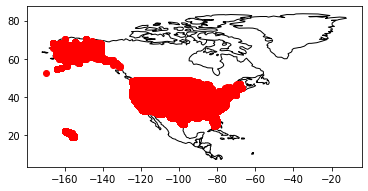

In [ ]:
us_region_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# my interest region.
data = us_region_map[us_region_map.continent == 'North America'].plot(
    color='black', edgecolor='white')

# plot the data
gdf_point.plot(ax=data, color='red')

plt.show()

#Topography Extraction

## load data

In [ ]:
eachfire='/content/gdrive/MyDrive/Thesis/data_output.csv'
eachfire = pd.read_csv(eachfire)
eachfire.drop(['Unnamed: 0','Unnamed: 0.1'], inplace=True, axis=1)

In [ ]:
eachfire.head(100)

lat         lon      x     y  H  V    i     j       dtime  conf  \
0   19.437500 -155.084888   4050  8467  3  7   67   450  2014-01-01     9   
1   19.437500 -155.076051   4051  8467  3  7   67   451  2014-01-01     9   
2   19.437500 -155.067214   4052  8467  3  7   67   452  2014-01-01     9   
3   19.437500 -155.058377   4053  8467  3  7   67   453  2014-01-01     9   
4   19.429167 -155.085766   4049  8468  3  7   68   449  2014-01-01     9   
..        ...         ...    ...   ... .. ..  ...   ...         ...   ...   
95  34.012500  -97.431517  11908  6718  9  5  718  1108  2014-01-02     8   
96  34.012500  -97.421464  11909  6718  9  5  718  1109  2014-01-02     8   
97  34.012500  -97.411410  11910  6718  9  5  718  1110  2014-01-02     8   
98  34.004167  -97.432008  11907  6719  9  5  719  1107  2014-01-02     8   
99  34.004167  -97.421956  11908  6719  9  5  719  1108  2014-01-02     8   

    maxFRP satellite                  neigh     t                   country  \
0     1476       MYD  cloud (land or water)  4383  United States of America   
1     1476       MYD  cloud (land or water)  4383  United States of America   
2      955       MYD  cloud (land or water)  4383  United States of America   
3      955       MYD  cloud (land or water)  4383  United States of America   
4      299       MYD  cloud (land or water)  4383  United States of America   
..     ...       ...                    ...   ...                       ...   
95     202       MYD    non-fire land pixel  4384  United States of America   
96     296       MYD    non-fire land pixel  4384  United States of America   
97     296       MYD    non-fire land pixel  4384  United States of America   
98     202       MYD    non-fire land pixel  4384  United States of America   
99     202       MYD    non-fire land pixel  4384  United States of America   

        continent  neigh_int       gl       cp  
0   North America          3     2919    32636  
1   North America          3     2956    32636  
2   North America          3     2996    32636  
3   North America          3     3034    32636  
4   North America          3     2884    32636  
..            ...        ...      ...      ...  
95  North America          5  1711454  6916627  
96  North America          5  1712245  6916627  
97  North America          5  1713028  6916627  
98  North America          5  1710692  6916627  
99  North America          5  1711455  6916627  

[100 rows x 19 columns]

In [ ]:
srtm_elv = eachfire[['lon', 'lat']].copy()

In [ ]:
list_df = np.array_split(srtm_elv, 60)

In [ ]:
list_df

[               lon        lat
 0      -155.084888  19.437500
 1      -155.076051  19.437500
 2      -155.067214  19.437500
 3      -155.058377  19.437500
 4      -155.085766  19.429167
 ...            ...        ...
 716273  -92.076749  35.854167
 716274  -95.203467  35.820833
 716275  -92.538272  35.720833
 716276  -92.528008  35.720833
 716277  -92.549122  35.712500
 
 [716278 rows x 2 columns],                lon        lat
 716278  -92.538859  35.712500
 716279  -92.528595  35.712500
 716280  -92.118697  35.704167
 716281  -92.108434  35.704167
 716282  -92.098172  35.704167
 ...            ...        ...
 1432550 -79.879981  33.029167
 1432551 -79.892306  33.020833
 1432552 -79.882368  33.020833
 1432553 -79.872429  33.020833
 1432554 -79.884756  33.012500
 
 [716277 rows x 2 columns]]

## Extracting From Database

In [ ]:
elevation_data = ee.Image("USGS/SRTMGL1_003")

def extract_data_elevation(nodes,n):
    coordinate_points = [ee.Geometry.Point(coord) for coord in nodes]

    # list order
    feature_points = [ee.Feature(p, {'data_index': '{}'.format(i)}) for i, p in enumerate(coordinate_points)]

    # create featurecollection from coordinate points
    ee_feature_collection = ee.FeatureCollection(feature_points)

    # extract elevation from coordinate points
    ee_red_first = ee.Reducer.first()
    data_extraction = elevation_data.reduceRegions(ee_feature_collection, ee_red_first.setOutputs(['elevation']), 30)

    #save to CSV
    ele = 'Elevation' + str(n)
    csv_export = ee.batch.Export.table.toDrive(data_extraction, 'pointsDataExtract', 'Data', ele)
    csv_export.start()
    return

In [ ]:

n = 0
while n <= 60:
  nodess = list_df[n].values.tolist()
  extract_data_elevation(nodess,n)
  time.sleep(5)
  n += 1
  if n == 60:
    break

##save

In [ ]:
files = os.path.join("elevation", "ele*.csv")

In [ ]:
files = glob.glob(files)
files = sorted(files, key=lambda x:float(re.findall("(\d+)",x)[0]))
files

In [ ]:
ele = pd.concat(map(pd.read_csv, files), ignore_index=True)
ele.rename({'.geo': 'lokasi'}, axis=1, inplace=True)

In [ ]:
ele

In [ ]:
ele.lokasi = ele.lokasi.str.split('\:').str[-1]
ele['lokasi'] = ele['lokasi'].str.replace('\[','')
ele['lokasi'] = ele['lokasi'].str.replace('\]}','')

In [ ]:
ele['lat']  = ele.lokasi.str.split('\,').str[-1]
ele['lat'] = ele['lat'].astype(float)
ele['lon']  = ele.lokasi.str.split('\,').str[0]
ele['lon'] = ele['lon'].astype(float)
ele = ele.drop(columns=['system:index', 'data_index','lokasi'])

In [ ]:
ele.info()
eachfire.info()


In [ ]:
full =  pd.merge(eachfire, ele, left_index=True, right_index=True)

In [ ]:
full.to_csv('data_elev.csv')

#NOAA Extraction

## Weather Station

In [ ]:
noaa_satelite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2 non-null      int64  
 1   lat         2 non-null      float64
 2   lon         2 non-null      float64
 3   x           2 non-null      int64  
 4   y           2 non-null      int64  
 5   H           2 non-null      int64  
 6   V           2 non-null      int64  
 7   i           2 non-null      int64  
 8   j           2 non-null      int64  
 9   dtime       2 non-null      object 
 10  conf        2 non-null      int64  
 11  maxFRP      2 non-null      int64  
 12  neigh       2 non-null      object 
 13  t           2 non-null      int64  
 14  neigh_int   2 non-null      int64  
 15  cp          2 non-null      int64  
 16  elevation   2 non-null      float64
 17  point       2 non-null      object 
 18  closest     2 non-null      object 
 19  station_id  2 non-null      objec

In [ ]:
cpy_noaa = noaa_station_look

In [ ]:
station = noaa_station
station

STATION_ID            STATION STATE COUNTRY  LATITUDE  LONGITUDE  \
0    USC00160007          ABBEVILLE    LA      US   29.9689   -92.1169   
1    USC00030006             ABBOTT    AR      US   35.0236   -94.1594   
2    USC00290022        ABBOTT 1 SE    NM      US   36.3028  -104.2497   
3    US1PAAD0002  ABBOTTSTOWN 2.4 N    PA      US   39.9192   -76.9894   
4    USC00220021           ABERDEEN    MS      US   33.8300   -88.5214   
..           ...                ...   ...     ...       ...        ...   
995  USS0019L41S      Burnside Lake    CA      US   38.7200  -119.8900   
996  USS0021B63S     Burnt Mountain    WA      US   47.0400  -121.9400   
997  USS0009D21S          Burnt Mtn    MT      US   45.2400  -109.4600   
998  USS0007K02S     Burro Mountain    CO      US   39.8800  -107.6000   
999  USS0009F04S    Burroughs Creek    WY      US   43.7000  -109.6700   

     ELEVATION  
0          3.0  
1        207.3  
2       1874.5  
3        139.0  
4         60.4  
..         ...  
995     2477.7  
996     1271.0  
997     1792.2  
998     2865.1  
999     2667.0  

[1000 rows x 7 columns]

## Looking the closest station

In [ ]:
import pandas as pd
from scipy.spatial.distance import cdist

In [ ]:
#looking the closest station from the fire location
def look_closest_station_coordinate(point, coordinate):
    return coordinate[cdist([point], coordinate).argmin()]

#looking the station id from the closest point
def look_station_id(df, coloum1, point_x, coloum2):
    return df[df[coloum1] == point_x][coloum2].values[0]

# create coordinate point
station['point'] = [(x , y) for x , y in zip(station['LATITUDE'], station['LONGITUDE'])]
noaa_station_look['point'] = [(x , y) for x , y in zip(noaa_station_look['lat'], noaa_station_look['lon'])]


In [ ]:
# extract station id
noaa_station_look['closest'] = [look_closest_station_coordinate(x, list(station['point'])) for x in noaa_station_look['point']]
noaa_station_look['station_id'] = [look_station_id(station, 'point', x, 'STATION_ID') for x in noaa_station_look['closest']]

In [ ]:

noaa_station_look['dtime'] = pd.to_datetime(noaa_station_look['dtime'], errors='coerce')
noaa_station_look['year'] = pd.DatetimeIndex(noaa_station_look['dtime']).year
noaa_station_look['month'] = pd.DatetimeIndex(noaa_station_look['dtime']).month
noaa_station_look['date'] = pd.DatetimeIndex(noaa_station_look['dtime']).day
noaa_station_look

lat         lon      x     y   H  V    i    j      dtime  conf  \
0        19.437500 -155.084888   4050  8467   3  7   67  450 2014-01-01     9   
1        19.437500 -155.076051   4051  8467   3  7   67  451 2014-01-01     9   
2        19.437500 -155.067214   4052  8467   3  7   67  452 2014-01-01     9   
3        19.437500 -155.058377   4053  8467   3  7   67  453 2014-01-01     9   
4        19.429167 -155.085766   4049  8468   3  7   68  449 2014-01-01     9   
...            ...         ...    ...   ...  .. ..  ...  ...        ...   ...   
1432550  33.029167  -79.879981  13563  6836  11  5  836  363 2019-12-31     8   
1432551  33.020833  -79.892306  13561  6837  11  5  837  361 2019-12-31     7   
1432552  33.020833  -79.882368  13562  6837  11  5  837  362 2019-12-31     8   
1432553  33.020833  -79.872429  13563  6837  11  5  837  363 2019-12-31     8   
1432554  33.012500  -79.884756  13561  6838  11  5  838  361 2019-12-31     7   

         ...     t neigh_int        cp  elevation  \
0        ...  4383         3     32636      647.0   
1        ...  4383         3     32636      621.0   
2        ...  4383         3     32636      593.0   
3        ...  4383         3     32636      570.0   
4        ...  4383         3     32636      661.0   
...      ...   ...       ...       ...        ...   
1432550  ...  6573         5  10248728       14.0   
1432551  ...  6573         4  10248728        9.0   
1432552  ...  6573         4  10248728       16.0   
1432553  ...  6573         5  10248728        5.0   
1432554  ...  6573         4  10248728        8.0   

                                            point               closest  \
0        (19.43749999825444, -155.08488765250274)  (38.3208, -123.0747)   
1        (19.43749999825444, -155.07605065500124)  (38.3208, -123.0747)   
2        (19.43749999825444, -155.06721365749976)  (38.3208, -123.0747)   
3        (19.43749999825444, -155.05837665999823)  (38.3208, -123.0747)   
4        (19.42916666492185, -155.08576636185774)  (38.3208, -123.0747)   
...                                           ...                   ...   
1432550   (33.02916666370054, -79.87998072138602)   (33.4408, -79.5672)   
1432551  (33.020833330367964, -79.89230642127731)   (33.4408, -79.5672)   
1432552  (33.020833330367964, -79.88236771300821)   (33.4408, -79.5672)   
1432553  (33.020833330367964, -79.87242900473909)   (33.4408, -79.5672)   
1432554   (33.01249999703538, -79.88475594307026)   (33.4408, -79.5672)   

          station_id  year month  date  
0        USW00093245  2014     1     1  
1        USW00093245  2014     1     1  
2        USW00093245  2014     1     1  
3        USW00093245  2014     1     1  
4        USW00093245  2014     1     1  
...              ...   ...   ...   ...  
1432550  USC00380184  2019    12    31  
1432551  USC00380184  2019    12    31  
1432552  USC00380184  2019    12    31  
1432553  USC00380184  2019    12    31  
1432554  USC00380184  2019    12    31  

[1432555 rows x 22 columns]

In [ ]:
# Save to csv
noaa_station_look.to_csv('noaa_satelite.csv')

## Extract Data from NOAA Database

In [ ]:
noaa_satelite = noaa_nearest_station

In [ ]:
noaa_extracting = noaa_satelite[['station_id', 'year','month',"date"]].copy()

In [ ]:
print(noaa_extracting.head(100))

       station_id  year  month  date
29    USC00411045  2014      1     1
30    USC00410779  2014      1     1
31    USC00410498  2014      1     1
34    US1ARLK0001  2014      1     1
36    USC00340257  2014      1     1
...           ...   ...    ...   ...
2385  USC00410690  2014      1    15
2386  USW00012919  2014      1    15
2390  USC00140447  2014      1    15
2399  USC00230163  2014      1    15
2402  USC00030130  2014      1    15

[100 rows x 4 columns]


In [ ]:
noaa_extracting = noaa_extracting.drop_duplicates(subset=['station_id', 'year','month',"date"], keep=False)

In [ ]:
noaa_extracting

station_id  year  month  date
29       USC00411045  2014      1     1
30       USC00410779  2014      1     1
31       USC00410498  2014      1     1
34       US1ARLK0001  2014      1     1
36       USC00340257  2014      1     1
...              ...   ...    ...   ...
1432462  USC00090140  2019     12    31
1432517  USW00063856  2019     12    31
1432543  USW00012884  2019     12    31
1432544  USC00080228  2019     12    31
1432549  USC00380448  2019     12    31

[30749 rows x 4 columns]

In [ ]:
list_df = np.array_split(noaa_extracting, 60)

In [ ]:
list_df

[        station_id  year  month  date
 29     USC00411045  2014      1     1
 30     USC00410779  2014      1     1
 31     USC00410498  2014      1     1
 34     US1ARLK0001  2014      1     1
 36     USC00340257  2014      1     1
 ...            ...   ...    ...   ...
 22290  USC00010390  2014      3     7
 22291  USC00010063  2014      3     7
 22292  USC00220955  2014      3     7
 22295  USC00030286  2014      3     7
 22296  USC00010764  2014      3     7
 
 [513 rows x 4 columns],         station_id  year  month  date
 22300  USC00080369  2014      3     7
 22301  USC00080737  2014      3     7
 22311  USC00461282  2014      3     7
 22314  USC00120550  2014      3     7
 22371  US10butl011  2014      3     8
 ...            ...   ...    ...   ...
 57621  USC00381093  2014      4     9
 57646  US1PAAD0002  2014      4     9
 57703  USC00020808  2014      4    10
 57779  USW00024133  2014      4    10
 57801  USS0014K02S  2014      4    10
 
 [513 rows x 4 columns],         sta

## Extracting from the database

In [ ]:
import json
import requests
from io import StringIO
def extract_landstation_noaa( data_extrct , which_stations, year, month, date):
  which_stations = str(which_stations)
  year_noaa = str(year)
  month_noaa = (str(month).zfill(2))
  date_noaa = (str(date).zfill(2))
  full_url = 'https://www.ncei.noaa.gov/access/services/data/v1/?' + 'dataset=daily-summaries&dataTypes='+ data_extrct +'&stations=' + which_stations + '&startDate='+year_noaa+'-'+month_noaa+'-'+date_noaa+'&endDate='+year_noaa+'-'+month_noaa+'-'+date_noaa+'&units=standard'
  try:
    response = requests.get(full_url).text
    noaa_extract = pd.read_csv(StringIO(response), sep=r",", on_bad_lines='skip')
    data_extrct = noaa_extract.iloc[0]
    tmax = data_extrct["TMAX"]
    tmin = data_extrct["TMIN"]
    result = (tmax + tmin) / 2
    cel = (result - 32) * 5 / 9
  except:
    cel = "nan"
  return cel

In [ ]:
import time
n = 0
while n <= 60:
  nodess = list_df[n].values.tolist()
  df = pd.DataFrame (nodess, columns = ['station_id', 'year','month',"date"])
  df['temp'] = df.apply(lambda x: extract_landstation_noaa('TMAX,TMIN', x['station_id'], x['year'], x['month'], x['date']), axis=1)
  no = str(n)
  df.to_csv('temp'+ no +'.csv')
  print(no + 'already' )
  time.sleep(5)
  n += 1
  if n == 60:
    break

## save

In [ ]:
files = os.path.join("", "temp*.csv")

In [ ]:
files = glob.glob(files)
files = sorted(files, key=lambda x:float(re.findall("(\d+)",x)[0]))
files

In [ ]:
temperature = pd.concat(map(pd.read_csv, files), ignore_index=True)

In [ ]:
temperature

In [ ]:
temperature.to_csv('temperature.csv')

#Land_Cover Extraction

## loading Dataset

In [ ]:
Landcover_satelite = noaa_satelite
Landcover_satelite = Landcover_satelite[['lon', 'lat']].copy()

In [ ]:
Landcover_satelite

lon        lat
0       -155.084888  19.437500
1       -155.076051  19.437500
2       -155.067214  19.437500
3       -155.058377  19.437500
4       -155.085766  19.429167
...             ...        ...
1432550  -79.879981  33.029167
1432551  -79.892306  33.020833
1432552  -79.882368  33.020833
1432553  -79.872429  33.020833
1432554  -79.884756  33.012500

[1432555 rows x 2 columns]

In [ ]:
Landcover_satelite.drop(Landcover_satelite.index[0:509156], inplace=True)

In [ ]:
Landcover_satelite

lon        lat
509156  -94.943233  32.070833
509157  -97.432214  32.062500
509158  -97.422381  32.062500
509159  -97.412547  32.062500
509160  -97.402714  32.062500
...            ...        ...
1432550 -79.879981  33.029167
1432551 -79.892306  33.020833
1432552 -79.882368  33.020833
1432553 -79.872429  33.020833
1432554 -79.884756  33.012500

[923399 rows x 2 columns]

In [ ]:
list_df = np.array_split(Landcover_satelite, 120)

In [ ]:
list_df

[               lon        lat
 509156  -94.943233  32.070833
 509157  -97.432214  32.062500
 509158  -97.422381  32.062500
 509159  -97.412547  32.062500
 509160  -97.402714  32.062500
 ...            ...        ...
 516846  -98.819991  29.554167
 516847  -97.998039  26.387500
 516848  -97.988736  26.387500
 516849 -111.319479  47.437500
 516850 -111.326489  47.429167
 
 [7695 rows x 2 columns],                lon        lat
 516851 -111.314171  47.429167
 516852 -111.301853  47.429167
 516853 -111.308867  47.420833
 516854 -109.006906  44.720833
 516855 -108.995178  44.720833
 ...            ...        ...
 524541  -98.001081  28.320833
 524542  -97.991615  28.320833
 524543  -97.982149  28.320833
 524544  -98.021799  28.312500
 524545  -98.012333  28.312500
 
 [7695 rows x 2 columns],               lon        lat
 524546 -98.002867  28.312500
 524547 -97.993402  28.312500
 524548 -97.983936  28.312500
 524549 -97.974470  28.312500
 524550 -98.023585  28.304167
 ...           ...    

## Extracting from database

In [ ]:
#Connect to satelite image collection
landcoverdata = ee.ImageCollection('MODIS/006/MCD12Q1')
scale = 1000  # scale in meters

def landcoverss (lon,lat):
  p_lon = lon
  p_lat = lat
  goi = ee.Geometry.Point(p_lon, p_lat)
  try:
    landcover_result = landcoverdata.first().sample(goi, scale).first().get('LC_Type1').getInfo()
  except:
   landcover_result = "nan"
  return landcover_result

In [ ]:
import time
n = 0
while n <= 120:
  nodess = list_df[n].values.tolist()
  df = pd.DataFrame (nodess, columns = ['lon', 'lat'])
  df['landcover'] = df.apply(lambda x: landcoverss(x['lon'], x['lat']), axis=1)
  no = str(n)
  df.to_csv('/content/gdrive/MyDrive/Thesis/land_cover_add_'+ no +'.csv')
  time.sleep(5)
  print(no+'already')
  n += 1
  if n == 120:
    break


0already
1already
2already


3already
4already
5already
6already
7already
8already
9already
10already
11already
12already
13already
14already
15already
16already
17already
18already
19already
20already
21already
22already
23already
24already
25already
26already
27already
28already
29already
30already
31already
32already
33already
34already
35already
36already
37already


38already
39already
40already
41already
42already
43already


44already
45already
46already
47already
48already
49already
50already
51already
52already
53already
54already
55already
56already


## Save

In [ ]:
files = os.path.join("/content/gdrive/MyDrive/Thesis/MYD14A1", "landcover_add_*.csv")

In [ ]:
files = glob.glob(files)
files = sorted(files, key=lambda x:float(re.findall("(\d+)",x)[0]))
files

['/content/gdrive/MyDrive/Thesis/MYD14A1/landcover_add_0.csv',
 '/content/gdrive/MyDrive/Thesis/MYD14A1/landcover_add_1.csv',
 '/content/gdrive/MyDrive/Thesis/MYD14A1/landcover_add_2.csv',
 '/content/gdrive/MyDrive/Thesis/MYD14A1/landcover_add_3.csv',
 '/content/gdrive/MyDrive/Thesis/MYD14A1/landcover_add_4.csv',
 '/content/gdrive/MyDrive/Thesis/MYD14A1/landcover_add_5.csv',
 '/content/gdrive/MyDrive/Thesis/MYD14A1/landcover_add_6.csv',
 '/content/gdrive/MyDrive/Thesis/MYD14A1/landcover_add_7.csv',
 '/content/gdrive/MyDrive/Thesis/MYD14A1/landcover_add_8.csv',
 '/content/gdrive/MyDrive/Thesis/MYD14A1/landcover_add_9.csv',
 '/content/gdrive/MyDrive/Thesis/MYD14A1/landcover_add_10.csv',
 '/content/gdrive/MyDrive/Thesis/MYD14A1/landcover_add_11.csv',
 '/content/gdrive/MyDrive/Thesis/MYD14A1/landcover_add_12.csv',
 '/content/gdrive/MyDrive/Thesis/MYD14A1/landcover_add_13.csv',
 '/content/gdrive/MyDrive/Thesis/MYD14A1/landcover_add_14.csv',
 '/content/gdrive/MyDrive/Thesis/MYD14A1/landcover

In [ ]:
land_cover = pd.concat(map(pd.read_csv, files), ignore_index=True)

In [ ]:
land_cover

Unnamed: 0        lon        lat  landcover
0                0 -87.923731  34.679167        4.0
1                1 -92.028692  34.670833       12.0
2                2 -92.018559  34.670833       12.0
3                3 -92.008427  34.670833       12.0
4                4 -91.998294  34.670833       12.0
...            ...        ...        ...        ...
484779        8074 -79.879981  33.029167        5.0
484780        8075 -79.892306  33.020833        5.0
484781        8076 -79.882368  33.020833        1.0
484782        8077 -79.872429  33.020833        2.0
484783        8078 -79.884756  33.012500        8.0

[484784 rows x 4 columns]

In [ ]:
len(land_cover.index)

484784

In [ ]:
land_cover.drop(['Unnamed: 0'], inplace=True, axis=1)


In [ ]:
land_cover

lon        lat  landcover
0      -87.923731  34.679167        4.0
1      -92.028692  34.670833       12.0
2      -92.018559  34.670833       12.0
3      -92.008427  34.670833       12.0
4      -91.998294  34.670833       12.0
...           ...        ...        ...
484779 -79.879981  33.029167        5.0
484780 -79.892306  33.020833        5.0
484781 -79.882368  33.020833        1.0
484782 -79.872429  33.020833        2.0
484783 -79.884756  33.012500        8.0

[484784 rows x 3 columns]

In [ ]:
land_cover.to_csv('/content/gdrive/MyDrive/Thesis/land_cover_full_ready.csv')

# Data

## Combination With LandCover

In [ ]:
data_ele_noaastation_lc = noaa_nearest_station
#data_ele_noaastation_lc.drop(data_ele_noaastation_lc.index[947771:1432555], inplace=True)

In [ ]:
data_ele_noaastation_lc

Unnamed: 0        lat         lon      x     y   H  V    i    j  \
0                 0  19.437500 -155.084888   4050  8467   3  7   67  450   
1                 1  19.437500 -155.076051   4051  8467   3  7   67  451   
2                 2  19.437500 -155.067214   4052  8467   3  7   67  452   
3                 3  19.437500 -155.058377   4053  8467   3  7   67  453   
4                 4  19.429167 -155.085766   4049  8468   3  7   68  449   
...             ...        ...         ...    ...   ...  .. ..  ...  ...   
1432550     1432550  33.029167  -79.879981  13563  6836  11  5  836  363   
1432551     1432551  33.020833  -79.892306  13561  6837  11  5  837  361   
1432552     1432552  33.020833  -79.882368  13562  6837  11  5  837  362   
1432553     1432553  33.020833  -79.872429  13563  6837  11  5  837  363   
1432554     1432554  33.012500  -79.884756  13561  6838  11  5  838  361   

              dtime  ...     t  neigh_int        cp  elevation  \
0        2014-01-01  ...  4383          3     32636      647.0   
1        2014-01-01  ...  4383          3     32636      621.0   
2        2014-01-01  ...  4383          3     32636      593.0   
3        2014-01-01  ...  4383          3     32636      570.0   
4        2014-01-01  ...  4383          3     32636      661.0   
...             ...  ...   ...        ...       ...        ...   
1432550  2019-12-31  ...  6573          5  10248728       14.0   
1432551  2019-12-31  ...  6573          4  10248728        9.0   
1432552  2019-12-31  ...  6573          4  10248728       16.0   
1432553  2019-12-31  ...  6573          5  10248728        5.0   
1432554  2019-12-31  ...  6573          4  10248728        8.0   

                                            point               closest  \
0        (19.43749999825444, -155.08488765250274)  (38.3208, -123.0747)   
1        (19.43749999825444, -155.07605065500124)  (38.3208, -123.0747)   
2        (19.43749999825444, -155.06721365749976)  (38.3208, -123.0747)   
3        (19.43749999825444, -155.05837665999823)  (38.3208, -123.0747)   
4        (19.42916666492185, -155.08576636185774)  (38.3208, -123.0747)   
...                                           ...                   ...   
1432550   (33.02916666370054, -79.87998072138602)   (33.4408, -79.5672)   
1432551  (33.020833330367964, -79.89230642127731)   (33.4408, -79.5672)   
1432552  (33.020833330367964, -79.88236771300821)   (33.4408, -79.5672)   
1432553  (33.020833330367964, -79.87242900473909)   (33.4408, -79.5672)   
1432554   (33.01249999703538, -79.88475594307026)   (33.4408, -79.5672)   

          station_id  year month date  
0        USW00093245  2014     1    1  
1        USW00093245  2014     1    1  
2        USW00093245  2014     1    1  
3        USW00093245  2014     1    1  
4        USW00093245  2014     1    1  
...              ...   ...   ...  ...  
1432550  USC00380184  2019    12   31  
1432551  USC00380184  2019    12   31  
1432552  USC00380184  2019    12   31  
1432553  USC00380184  2019    12   31  
1432554  USC00380184  2019    12   31  

[1432555 rows x 23 columns]

In [ ]:
Landcover_ready = Landcover_ready.drop(columns=['Unnamed: 0', 'lon','lat'])
Landcover_ready

landcover
0             2.0
1             2.0
2             2.0
3             2.0
4             2.0
...           ...
947766        4.0
947767        4.0
947768        4.0
947769        4.0
947770        4.0

[947771 rows x 1 columns]

In [ ]:
data_ele_noaastation_lc = data_ele_noaastation_lc.drop(columns=['Unnamed: 0'])
data_ele_noaastation_lc

lat         lon      x     y   H  V    i    j       dtime  conf  \
0       19.437500 -155.084888   4050  8467   3  7   67  450  2014-01-01     9   
1       19.437500 -155.076051   4051  8467   3  7   67  451  2014-01-01     9   
2       19.437500 -155.067214   4052  8467   3  7   67  452  2014-01-01     9   
3       19.437500 -155.058377   4053  8467   3  7   67  453  2014-01-01     9   
4       19.429167 -155.085766   4049  8468   3  7   68  449  2014-01-01     9   
...           ...         ...    ...   ...  .. ..  ...  ...         ...   ...   
947766  34.687500  -87.932581  12923  6637  10  5  637  923  2017-10-18     9   
947767  34.687500  -87.922446  12924  6637  10  5  637  924  2017-10-18     9   
947768  34.687500  -87.912312  12925  6637  10  5  637  925  2017-10-18     8   
947769  34.679167  -87.943998  12921  6638  10  5  638  921  2017-10-18     8   
947770  34.679167  -87.933865  12922  6638  10  5  638  922  2017-10-18     9   

        ...     t neigh_int       cp  elevation  \
0       ...  4383         3    32636      647.0   
1       ...  4383         3    32636      621.0   
2       ...  4383         3    32636      593.0   
3       ...  4383         3    32636      570.0   
4       ...  4383         3    32636      661.0   
...     ...   ...       ...      ...        ...   
947766  ...  5769         5  3100973      264.0   
947767  ...  5769         5  3100973      264.0   
947768  ...  5769         5  3100973      250.0   
947769  ...  5769         5  3100973      276.0   
947770  ...  5769         5  3100973      216.0   

                                           point               closest  \
0       (19.43749999825444, -155.08488765250274)  (38.3208, -123.0747)   
1       (19.43749999825444, -155.07605065500124)  (38.3208, -123.0747)   
2       (19.43749999825444, -155.06721365749976)  (38.3208, -123.0747)   
3       (19.43749999825444, -155.05837665999823)  (38.3208, -123.0747)   
4       (19.42916666492185, -155.08576636185774)  (38.3208, -123.0747)   
...                                          ...                   ...   
947766   (34.68749999688495, -87.93258086307227)   (34.4772, -88.1994)   
947767    (34.68749999688495, -87.9224462948866)   (34.4772, -88.1994)   
947768    (34.68749999688495, -87.9123117267009)   (34.4772, -88.1994)   
947769   (34.67916666355238, -87.94399819352927)   (34.4772, -88.1994)   
947770   (34.67916666355238, -87.93386464531316)   (34.4772, -88.1994)   

         station_id  year month  date  
0       USW00093245  2014     1     1  
1       USW00093245  2014     1     1  
2       USW00093245  2014     1     1  
3       USW00093245  2014     1     1  
4       USW00093245  2014     1     1  
...             ...   ...   ...   ...  
947766  USC00220656  2017    10    18  
947767  USC00220656  2017    10    18  
947768  USC00220656  2017    10    18  
947769  USC00220656  2017    10    18  
947770  USC00220656  2017    10    18  

[947771 rows x 22 columns]

In [ ]:
data_ele_noaastation_lc =  pd.merge(data_ele_noaastation_lc, Landcover_ready, left_index=True, right_index=True)

In [ ]:
data_ele_noaastation_lc

lat         lon      x     y   H  V    i    j       dtime  conf  \
0       19.437500 -155.084888   4050  8467   3  7   67  450  2014-01-01     9   
1       19.437500 -155.076051   4051  8467   3  7   67  451  2014-01-01     9   
2       19.437500 -155.067214   4052  8467   3  7   67  452  2014-01-01     9   
3       19.437500 -155.058377   4053  8467   3  7   67  453  2014-01-01     9   
4       19.429167 -155.085766   4049  8468   3  7   68  449  2014-01-01     9   
...           ...         ...    ...   ...  .. ..  ...  ...         ...   ...   
947766  34.687500  -87.932581  12923  6637  10  5  637  923  2017-10-18     9   
947767  34.687500  -87.922446  12924  6637  10  5  637  924  2017-10-18     9   
947768  34.687500  -87.912312  12925  6637  10  5  637  925  2017-10-18     8   
947769  34.679167  -87.943998  12921  6638  10  5  638  921  2017-10-18     8   
947770  34.679167  -87.933865  12922  6638  10  5  638  922  2017-10-18     9   

        ...  neigh_int       cp  elevation  \
0       ...          3    32636      647.0   
1       ...          3    32636      621.0   
2       ...          3    32636      593.0   
3       ...          3    32636      570.0   
4       ...          3    32636      661.0   
...     ...        ...      ...        ...   
947766  ...          5  3100973      264.0   
947767  ...          5  3100973      264.0   
947768  ...          5  3100973      250.0   
947769  ...          5  3100973      276.0   
947770  ...          5  3100973      216.0   

                                           point               closest  \
0       (19.43749999825444, -155.08488765250274)  (38.3208, -123.0747)   
1       (19.43749999825444, -155.07605065500124)  (38.3208, -123.0747)   
2       (19.43749999825444, -155.06721365749976)  (38.3208, -123.0747)   
3       (19.43749999825444, -155.05837665999823)  (38.3208, -123.0747)   
4       (19.42916666492185, -155.08576636185774)  (38.3208, -123.0747)   
...                                          ...                   ...   
947766   (34.68749999688495, -87.93258086307227)   (34.4772, -88.1994)   
947767    (34.68749999688495, -87.9224462948866)   (34.4772, -88.1994)   
947768    (34.68749999688495, -87.9123117267009)   (34.4772, -88.1994)   
947769   (34.67916666355238, -87.94399819352927)   (34.4772, -88.1994)   
947770   (34.67916666355238, -87.93386464531316)   (34.4772, -88.1994)   

         station_id  year month date  landcover  
0       USW00093245  2014     1    1        2.0  
1       USW00093245  2014     1    1        2.0  
2       USW00093245  2014     1    1        2.0  
3       USW00093245  2014     1    1        2.0  
4       USW00093245  2014     1    1        2.0  
...             ...   ...   ...  ...        ...  
947766  USC00220656  2017    10   18        4.0  
947767  USC00220656  2017    10   18        4.0  
947768  USC00220656  2017    10   18        4.0  
947769  USC00220656  2017    10   18        4.0  
947770  USC00220656  2017    10   18        4.0  

[947771 rows x 23 columns]

##Combination With NOAA

In [ ]:
data_ele_noaastation_lc

lat         lon      x     y   H  V    i    j       dtime  conf  \
0       19.437500 -155.084888   4050  8467   3  7   67  450  2014-01-01     9   
1       19.437500 -155.076051   4051  8467   3  7   67  451  2014-01-01     9   
2       19.437500 -155.067214   4052  8467   3  7   67  452  2014-01-01     9   
3       19.437500 -155.058377   4053  8467   3  7   67  453  2014-01-01     9   
4       19.429167 -155.085766   4049  8468   3  7   68  449  2014-01-01     9   
...           ...         ...    ...   ...  .. ..  ...  ...         ...   ...   
947766  34.687500  -87.932581  12923  6637  10  5  637  923  2017-10-18     9   
947767  34.687500  -87.922446  12924  6637  10  5  637  924  2017-10-18     9   
947768  34.687500  -87.912312  12925  6637  10  5  637  925  2017-10-18     8   
947769  34.679167  -87.943998  12921  6638  10  5  638  921  2017-10-18     8   
947770  34.679167  -87.933865  12922  6638  10  5  638  922  2017-10-18     9   

        ...  neigh_int       cp  elevation  \
0       ...          3    32636      647.0   
1       ...          3    32636      621.0   
2       ...          3    32636      593.0   
3       ...          3    32636      570.0   
4       ...          3    32636      661.0   
...     ...        ...      ...        ...   
947766  ...          5  3100973      264.0   
947767  ...          5  3100973      264.0   
947768  ...          5  3100973      250.0   
947769  ...          5  3100973      276.0   
947770  ...          5  3100973      216.0   

                                           point               closest  \
0       (19.43749999825444, -155.08488765250274)  (38.3208, -123.0747)   
1       (19.43749999825444, -155.07605065500124)  (38.3208, -123.0747)   
2       (19.43749999825444, -155.06721365749976)  (38.3208, -123.0747)   
3       (19.43749999825444, -155.05837665999823)  (38.3208, -123.0747)   
4       (19.42916666492185, -155.08576636185774)  (38.3208, -123.0747)   
...                                          ...                   ...   
947766   (34.68749999688495, -87.93258086307227)   (34.4772, -88.1994)   
947767    (34.68749999688495, -87.9224462948866)   (34.4772, -88.1994)   
947768    (34.68749999688495, -87.9123117267009)   (34.4772, -88.1994)   
947769   (34.67916666355238, -87.94399819352927)   (34.4772, -88.1994)   
947770   (34.67916666355238, -87.93386464531316)   (34.4772, -88.1994)   

         station_id  year month date  landcover  
0       USW00093245  2014     1    1        2.0  
1       USW00093245  2014     1    1        2.0  
2       USW00093245  2014     1    1        2.0  
3       USW00093245  2014     1    1        2.0  
4       USW00093245  2014     1    1        2.0  
...             ...   ...   ...  ...        ...  
947766  USC00220656  2017    10   18        4.0  
947767  USC00220656  2017    10   18        4.0  
947768  USC00220656  2017    10   18        4.0  
947769  USC00220656  2017    10   18        4.0  
947770  USC00220656  2017    10   18        4.0  

[947771 rows x 23 columns]

In [ ]:
Temperature_ready

Unnamed: 0   station_id  year  month  date       temp
0               0  USC00411045  2014      1     1        NaN
1               1  USC00410779  2014      1     1   5.277778
2               2  USC00410498  2014      1     1        NaN
3               3  US1ARLK0001  2014      1     1        NaN
4               4  USC00340257  2014      1     1   6.666667
...           ...          ...   ...    ...   ...        ...
30744       30744  USC00090140  2019     12    31  10.277778
30745       30745  USW00063856  2019     12    31  12.777778
30746       30746  USW00012884  2019     12    31        NaN
30747       30747  USC00080228  2019     12    31  21.388889
30748       30748  USC00380448  2019     12    31  11.388889

[30749 rows x 6 columns]

In [ ]:
Temperature_ready['year'] = Temperature_ready['year'].astype("string")
Temperature_ready['month'] = Temperature_ready['month'].astype("string")
Temperature_ready['date'] = Temperature_ready['date'].astype("string")
Temperature_ready["dated"] = Temperature_ready[["year", "month","date"]].agg('-'.join, axis=1)
Temperature_ready = Temperature_ready.drop(columns=['Unnamed: 0',"year", "month","date"])
print(Temperature_ready)

        station_id       temp       dated
0      USC00411045        NaN    2014-1-1
1      USC00410779   5.277778    2014-1-1
2      USC00410498        NaN    2014-1-1
3      US1ARLK0001        NaN    2014-1-1
4      USC00340257   6.666667    2014-1-1
...            ...        ...         ...
30744  USC00090140  10.277778  2019-12-31
30745  USW00063856  12.777778  2019-12-31
30746  USW00012884        NaN  2019-12-31
30747  USC00080228  21.388889  2019-12-31
30748  USC00380448  11.388889  2019-12-31

[30749 rows x 3 columns]


In [ ]:
data_ele_noaastation_lc['year'] = data_ele_noaastation_lc['year'].astype("string")
data_ele_noaastation_lc['month'] = data_ele_noaastation_lc['month'].astype("string")
data_ele_noaastation_lc['date'] = data_ele_noaastation_lc['date'].astype("string")
data_ele_noaastation_lc["dated"] = data_ele_noaastation_lc[["year", "month","date"]].agg('-'.join, axis=1)
data_ele_noaastation_lc = data_ele_noaastation_lc.drop(columns=["year", "month","date"])
print(data_ele_noaastation_lc)

              lat         lon      x     y   H  V    i    j       dtime  conf  \
0       19.437500 -155.084888   4050  8467   3  7   67  450  2014-01-01     9   
1       19.437500 -155.076051   4051  8467   3  7   67  451  2014-01-01     9   
2       19.437500 -155.067214   4052  8467   3  7   67  452  2014-01-01     9   
3       19.437500 -155.058377   4053  8467   3  7   67  453  2014-01-01     9   
4       19.429167 -155.085766   4049  8468   3  7   68  449  2014-01-01     9   
...           ...         ...    ...   ...  .. ..  ...  ...         ...   ...   
947766  34.687500  -87.932581  12923  6637  10  5  637  923  2017-10-18     9   
947767  34.687500  -87.922446  12924  6637  10  5  637  924  2017-10-18     9   
947768  34.687500  -87.912312  12925  6637  10  5  637  925  2017-10-18     8   
947769  34.679167  -87.943998  12921  6638  10  5  638  921  2017-10-18     8   
947770  34.679167  -87.933865  12922  6638  10  5  638  922  2017-10-18     9   

        ...                

In [ ]:
data_ele_noaastation_lc = data_ele_noaastation_lc.drop(columns=["closest", "point"])

In [ ]:
data_ele_noaastation_lc["dated"] = pd.to_datetime(data_ele_noaastation_lc["dated"])
Temperature_ready["dated"] = pd.to_datetime(Temperature_ready["dated"])

In [ ]:
Temperature_ready.loc[Temperature_ready['station_id'] == "USW00093245"]

station_id       temp      dated
2506   USW00093245  15.555556 2014-07-14
3737   USW00093245  15.833333 2014-09-28
4274   USW00093245  14.166667 2014-11-01
8640   USW00093245  14.722222 2015-09-26
13827  USW00093245  13.055556 2016-09-15
14175  USW00093245        NaN 2016-10-04
15189  USW00093245        NaN 2016-12-03
20540  USW00093245   8.055556 2017-12-20
24301  USW00093245  15.277778 2018-08-31
24470  USW00093245  13.055556 2018-09-12
24692  USW00093245  12.777778 2018-09-23
25084  USW00093245  13.611111 2018-10-24
25686  USW00093245  10.277778 2019-01-04
25930  USW00093245   6.944444 2019-02-08
26114  USW00093245  10.000000 2019-03-10
26184  USW00093245   9.722222 2019-03-16
26581  USW00093245  13.055556 2019-04-05
26637  USW00093245  12.500000 2019-04-09
27195  USW00093245  12.777778 2019-05-12
27794  USW00093245  12.777778 2019-06-15
27910  USW00093245  13.888889 2019-06-26
27972  USW00093245  12.777778 2019-06-30
28101  USW00093245  12.500000 2019-07-06
28966  USW00093245  16.666667 2019-08-20
29677  USW00093245  11.388889 2019-09-30
29788  USW00093245  15.277778 2019-10-06
30085  USW00093245  23.611111 2019-10-24
30326  USW00093245  10.833333 2019-11-13

In [ ]:
combi_ele_temp_landcover = pd.merge_asof(data_ele_noaastation_lc, Temperature_ready, by='station_id', on='dated')

In [ ]:
combi_ele_temp_landcover.to_csv('combi_ele_temp_landcover.csv')

## Preprosseing

In [ ]:
combi_ele_temp_landcover = combi_ele_temp_landcover.dropna( how='any',
                    subset=['temp'])

In [ ]:
combi_ele_temp_landcover.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 667874 entries, 30 to 947695
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   lat         667874 non-null  float64       
 1   lon         667874 non-null  float64       
 2   x           667874 non-null  int64         
 3   y           667874 non-null  int64         
 4   H           667874 non-null  int64         
 5   V           667874 non-null  int64         
 6   i           667874 non-null  int64         
 7   j           667874 non-null  int64         
 8   dtime       667874 non-null  object        
 9   conf        667874 non-null  int64         
 10  maxFRP      667874 non-null  int64         
 11  neigh       667874 non-null  object        
 12  t           667874 non-null  int64         
 13  neigh_int   667874 non-null  int64         
 14  cp          667874 non-null  int64         
 15  elevation   609763 non-null  float64       
 16  s

In [ ]:
working_data = combi_ele_temp_landcover[["cp", "elevation","maxFRP","temp","dtime","landcover"]].copy()

In [ ]:
working_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 667874 entries, 30 to 947695
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   cp         667874 non-null  int64  
 1   elevation  609763 non-null  float64
 2   maxFRP     667874 non-null  int64  
 3   temp       667874 non-null  float64
 4   dtime      667874 non-null  object 
 5   landcover  667385 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 35.7+ MB


In [ ]:
df1 = working_data[working_data.isna().any(axis=1)]

In [ ]:
working_data.dropna(subset=['landcover'], inplace=True)

In [ ]:
working_data.dropna(subset=['elevation'], inplace=True)

In [ ]:
working_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609275 entries, 30 to 947695
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   cp         609275 non-null  int64  
 1   elevation  609275 non-null  float64
 2   maxFRP     609275 non-null  int64  
 3   temp       609275 non-null  float64
 4   dtime      609275 non-null  object 
 5   landcover  609275 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 32.5+ MB


In [ ]:
working_data

cp  elevation  maxFRP       temp       dtime  landcover
30      35065682      807.0      79   5.277778  2014-01-01        7.0
36      35602661      279.0      74   6.666667  2014-01-01        8.0
103     10137007      811.0      67   5.277778  2014-01-02       10.0
104     10137007      811.0     116   5.277778  2014-01-02       10.0
105     10137007      808.0      67   5.277778  2014-01-02       10.0
...          ...        ...     ...        ...         ...        ...
947691  11930369      160.0     155  22.500000  2017-10-18        9.0
947692  11930369      148.0     155  22.500000  2017-10-18       10.0
947693  11930369      145.0     155  22.500000  2017-10-18        9.0
947694  11930369      145.0     130  22.500000  2017-10-18        9.0
947695  15683855       62.0      66  25.833333  2017-10-18       12.0

[609275 rows x 6 columns]

In [ ]:
working_data.loc[working_data['cp'] == 134]

cp  elevation  maxFRP       temp       dtime  landcover
380862  134     1010.0     523  23.333333  2015-08-16       10.0
380863  134      694.0     523  23.333333  2015-08-16       10.0
380864  134      692.0     324  23.333333  2015-08-16       10.0
380865  134      493.0     198  23.333333  2015-08-16       10.0
380866  134      488.0     324  23.333333  2015-08-16       10.0
...     ...        ...     ...        ...         ...        ...
410022  134     1656.0     181  23.333333  2015-08-28        8.0
410023  134     1487.0    1292  23.333333  2015-08-28        9.0
410024  134     1407.0     208  23.333333  2015-08-28        9.0
410025  134     1421.0     208  23.333333  2015-08-28        9.0
411993  134     1158.0     200  23.333333  2015-08-29        1.0

[3149 rows x 6 columns]

In [ ]:
test = working_data.groupby('cp')[['elevation', 'maxFRP', 'temp','landcover']].mean().reset_index()

In [ ]:
days = analysis_fire[['cp', 'expansion', 'maxFRP_sum','duration']]

In [ ]:
days = days.sort_values('cp')

In [ ]:
working_ele_temp_landcover = pd.merge_asof(test, days, on='cp')

In [ ]:
working_ele_temp_landcover.to_csv('/content/gdrive/MyDrive/Thesis/working.csv')

## Ready working dataset

In [ ]:
working_ele_temp_landcover='/content/gdrive/MyDrive/Thesis/working.csv'
working_ele_temp_landcover = pd.read_csv(working_ele_temp_landcover)

In [ ]:
working_ele_temp_landcover = working_ele_temp_landcover.rename(columns={'cp': 'id'})

In [ ]:
working_ele_temp_landcover

Unnamed: 0        id    elevation       maxFRP       temp  landcover  \
0                0       128  1101.490619  2203.384615  12.517806   6.359287   
1                1       134   970.775484  2437.985710  22.517642   8.448079   
2                2       159  1998.589231  2382.124280  16.991948   8.690823   
3                3       177   714.369073  3902.880042  16.437053   1.345364   
4                4       217  1875.661843  3656.635948   6.951214   6.869764   
...            ...       ...          ...          ...        ...        ...   
104688      104688  36526543   242.000000    79.000000  23.333333  12.000000   
104689      104689  36526726   148.000000    75.000000  29.722222  10.000000   
104690      104690  36526808   368.000000    53.000000   3.055556  12.000000   
104691      104691  36527114   345.000000   205.000000  23.333333  12.000000   
104692      104692  36527322    72.000000    81.000000  29.166667  10.000000   

        expansion  maxFRP_sum  duration  
0       55.659731     7046424        17  
1       99.478962     7677217        14  
2       18.830747     7034413        29  
3       37.367782    11029539        25  
4       32.596317     9602326        27  
...           ...         ...       ...  
104688   0.858635          79         1  
104689   0.858635          75         1  
104690   0.858635          53         1  
104691   0.858635         205         1  
104692   0.858635          81         1  

[104693 rows x 9 columns]

In [ ]:
working_data = working_ele_temp_landcover.copy()

In [ ]:
working_data["duration"] = working_data["duration"].clip(upper=3)

In [ ]:
working_data

Unnamed: 0        cp    elevation       maxFRP       temp  landcover  \
0                0       128  1101.490619  2203.384615  12.517806   6.359287   
1                1       134   970.775484  2437.985710  22.517642   8.448079   
2                2       159  1998.589231  2382.124280  16.991948   8.690823   
3                3       177   714.369073  3902.880042  16.437053   1.345364   
4                4       217  1875.661843  3656.635948   6.951214   6.869764   
...            ...       ...          ...          ...        ...        ...   
104688      104688  36526543   242.000000    79.000000  23.333333  12.000000   
104689      104689  36526726   148.000000    75.000000  29.722222  10.000000   
104690      104690  36526808   368.000000    53.000000   3.055556  12.000000   
104691      104691  36527114   345.000000   205.000000  23.333333  12.000000   
104692      104692  36527322    72.000000    81.000000  29.166667  10.000000   

        expansion  maxFRP_sum  duration  
0       55.659731     7046424         3  
1       99.478962     7677217         3  
2       18.830747     7034413         3  
3       37.367782    11029539         3  
4       32.596317     9602326         3  
...           ...         ...       ...  
104688   0.858635          79         1  
104689   0.858635          75         1  
104690   0.858635          53         1  
104691   0.858635         205         1  
104692   0.858635          81         1  

[104693 rows x 9 columns]

In [ ]:
working_data['duration']= working_data[['duration']] - 1

In [ ]:
import random
import seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

seaborn.set(style='whitegrid'); seaborn.set_context('talk')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
from sklearn.model_selection import train_test_split

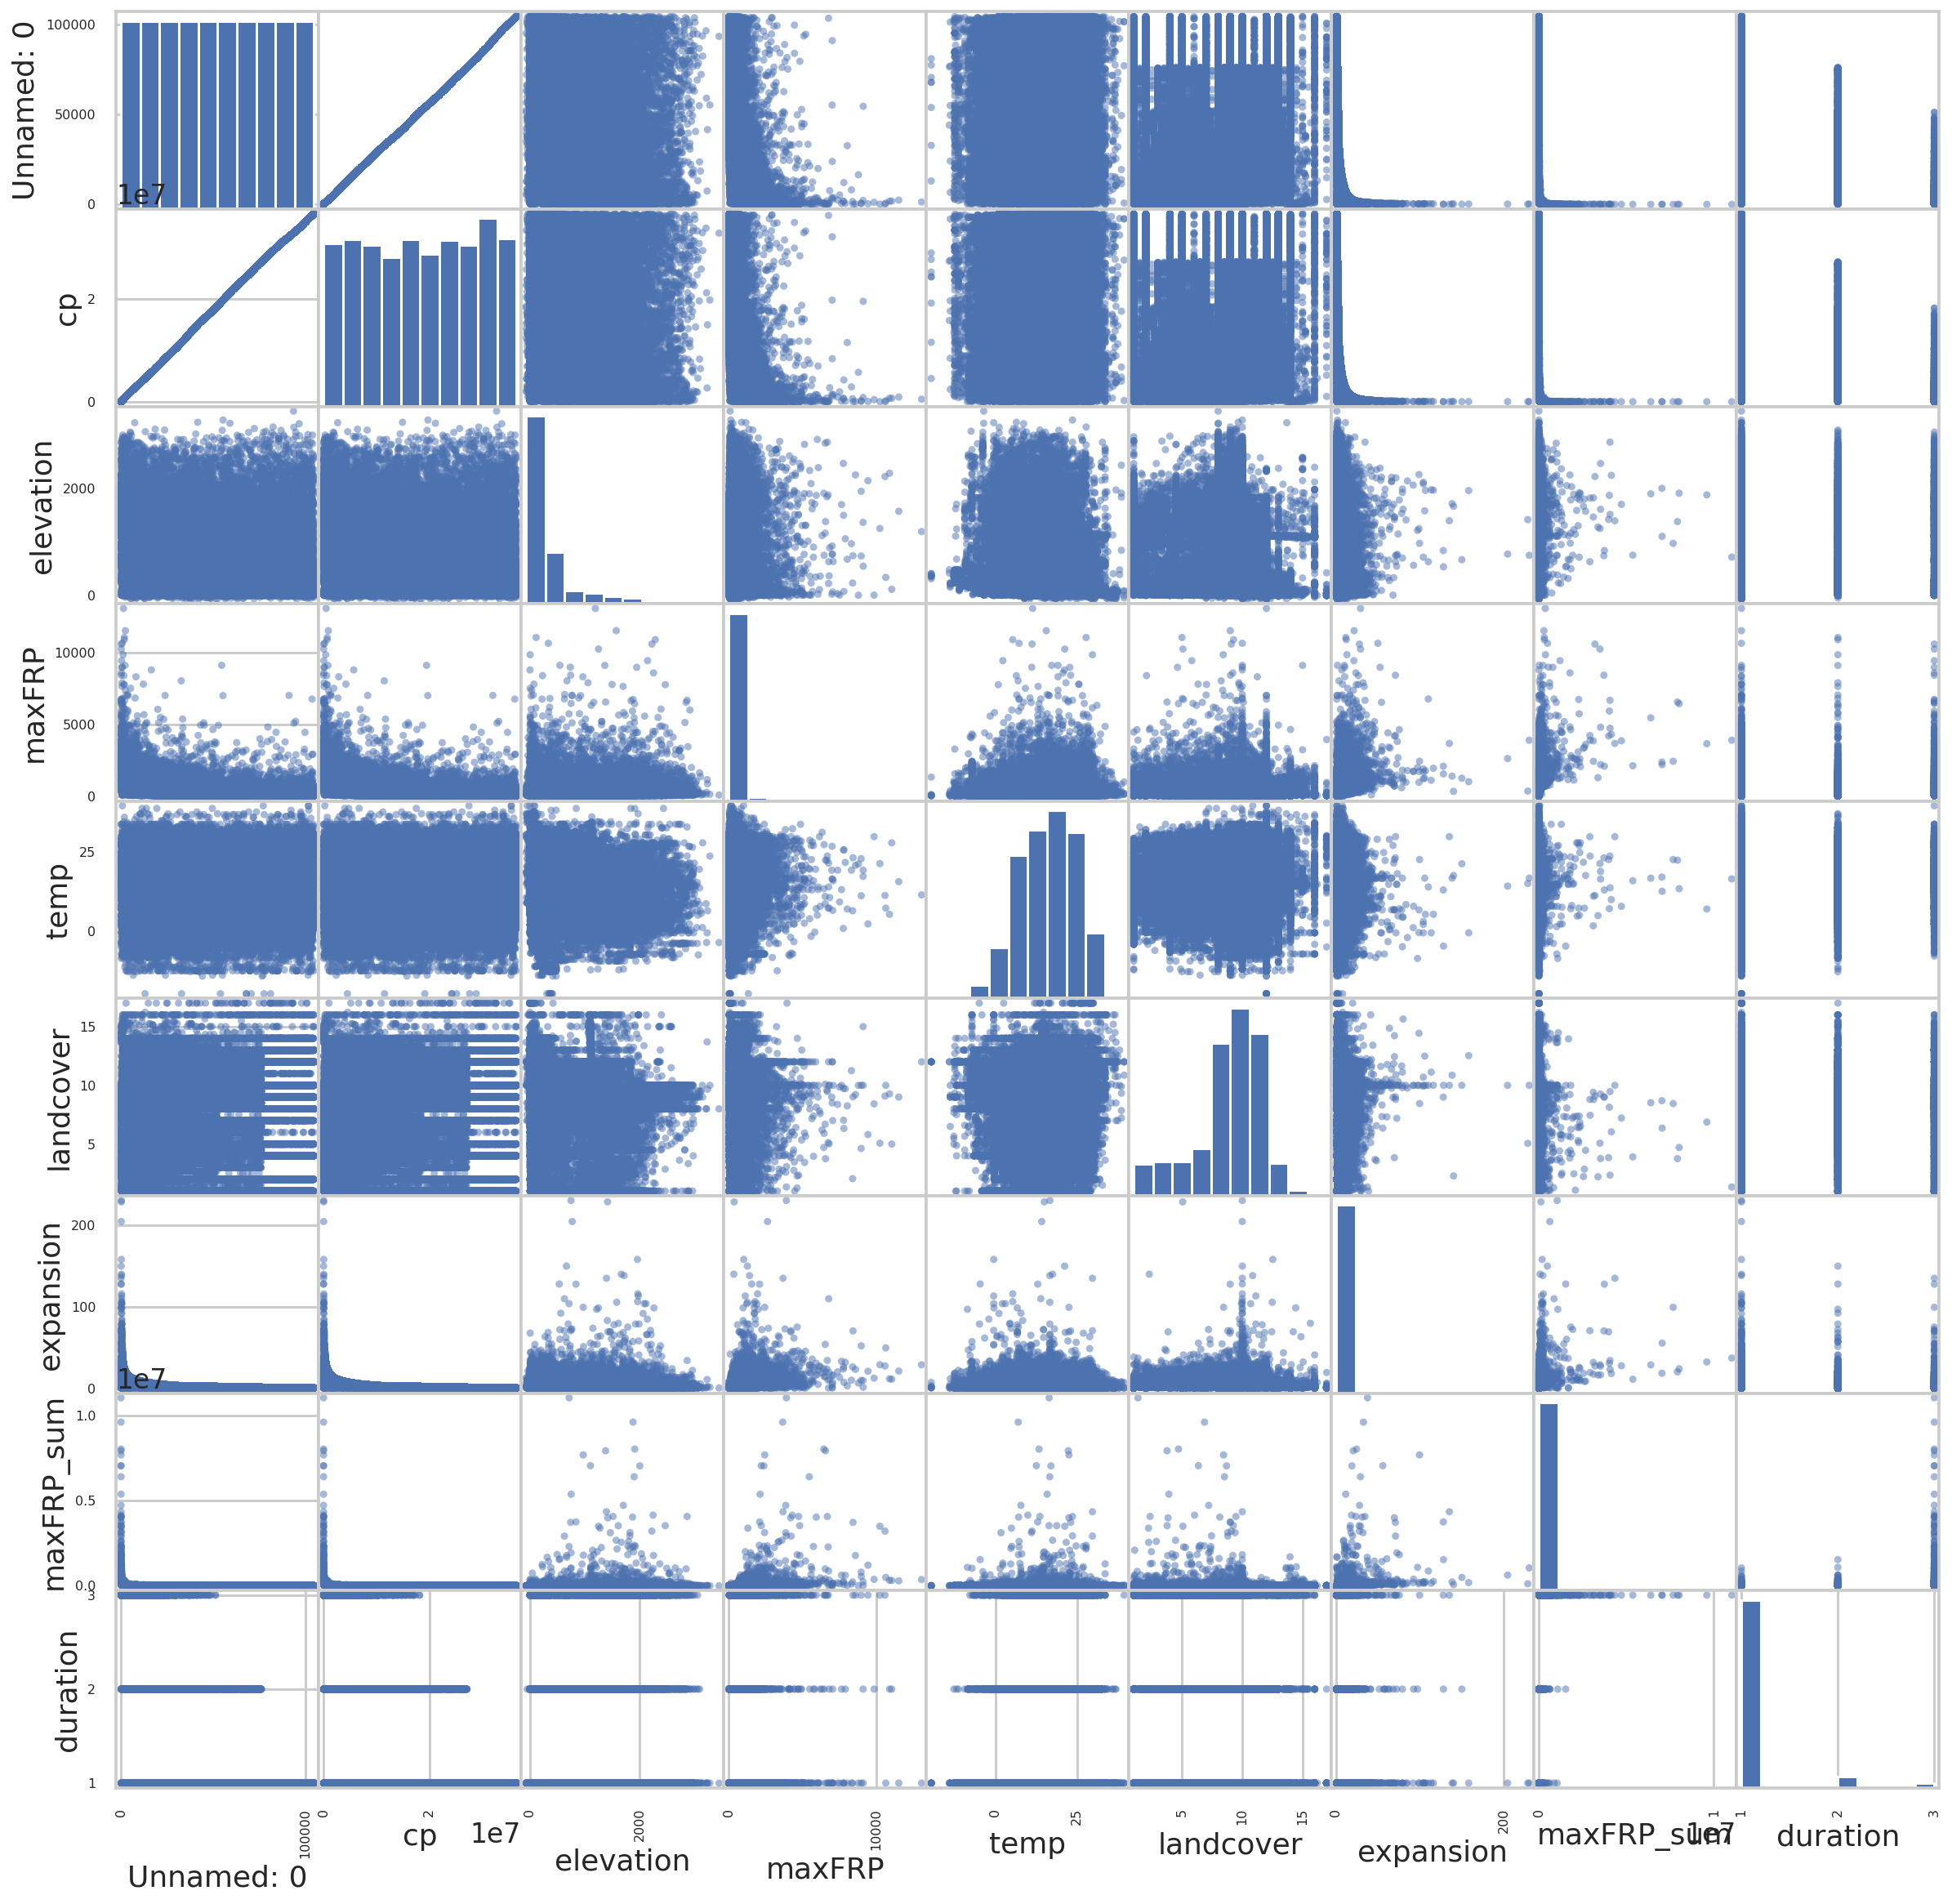

In [ ]:
import pandas
from pandas.plotting import scatter_matrix


scatter_matrix(working_data, alpha=0.5, figsize=(20, 20))
plt.show()

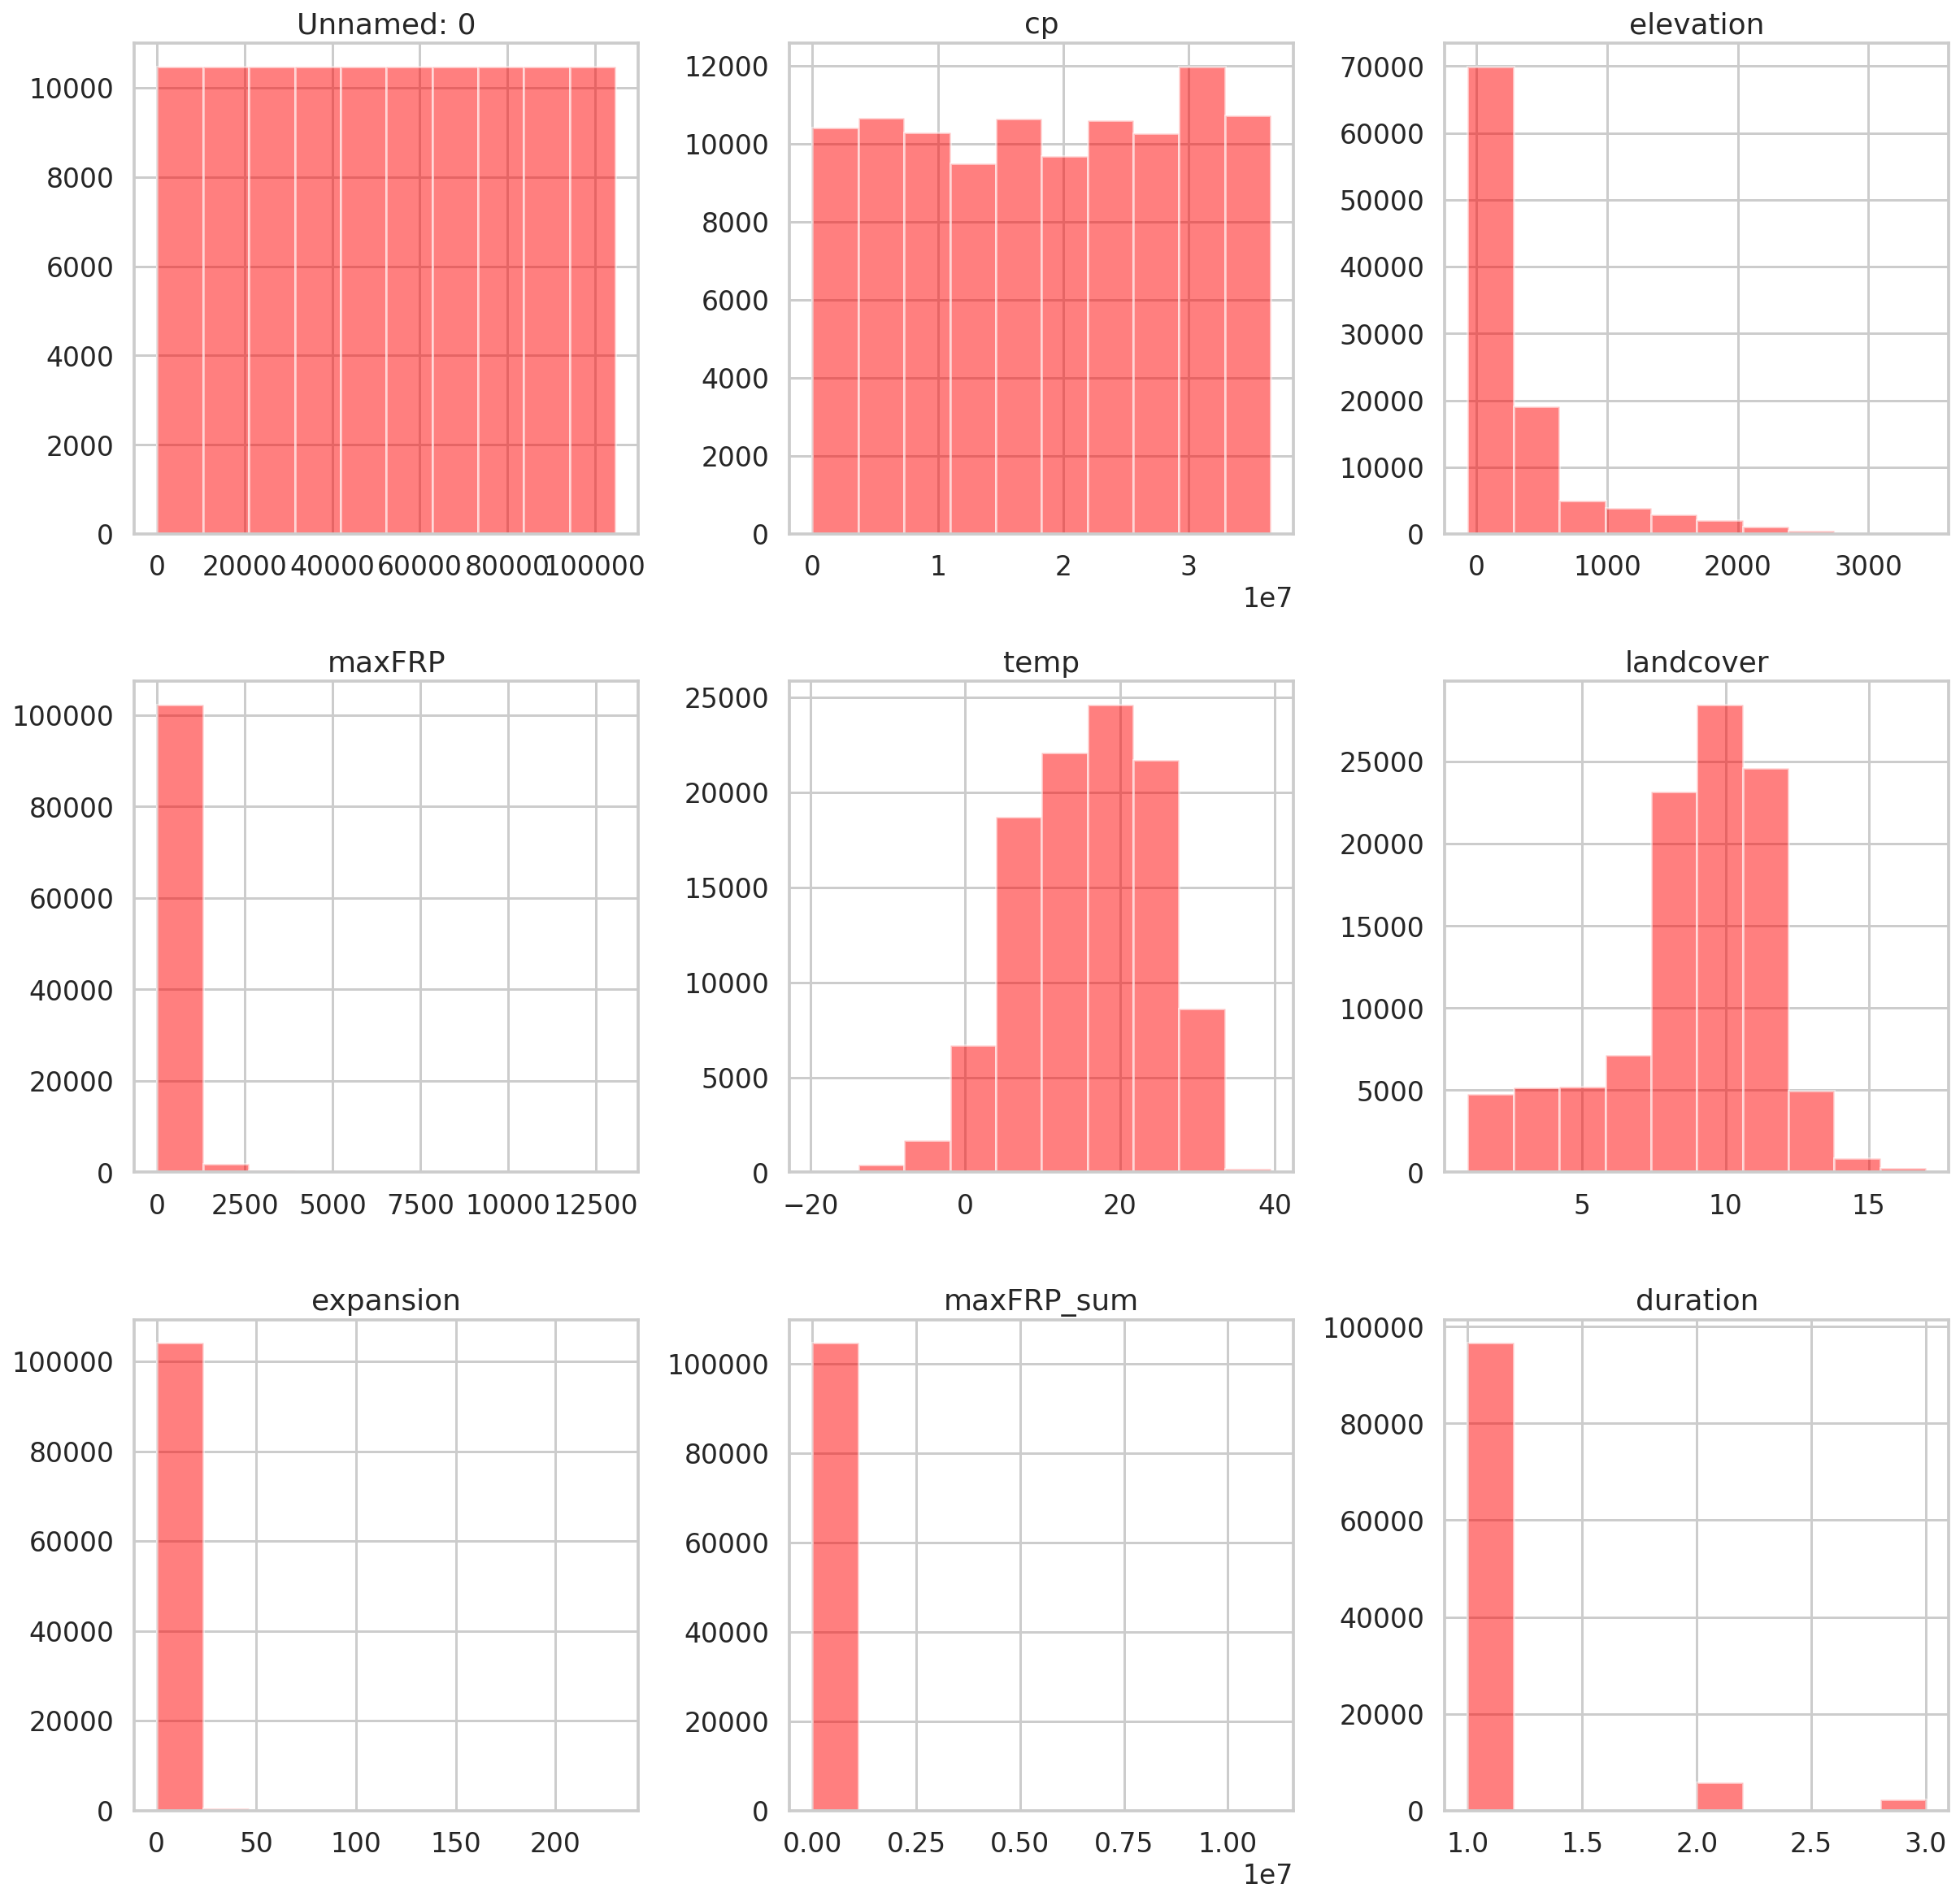

In [ ]:
working_data.hist(alpha=0.5, figsize=(20, 20), color='red')
plt.show()

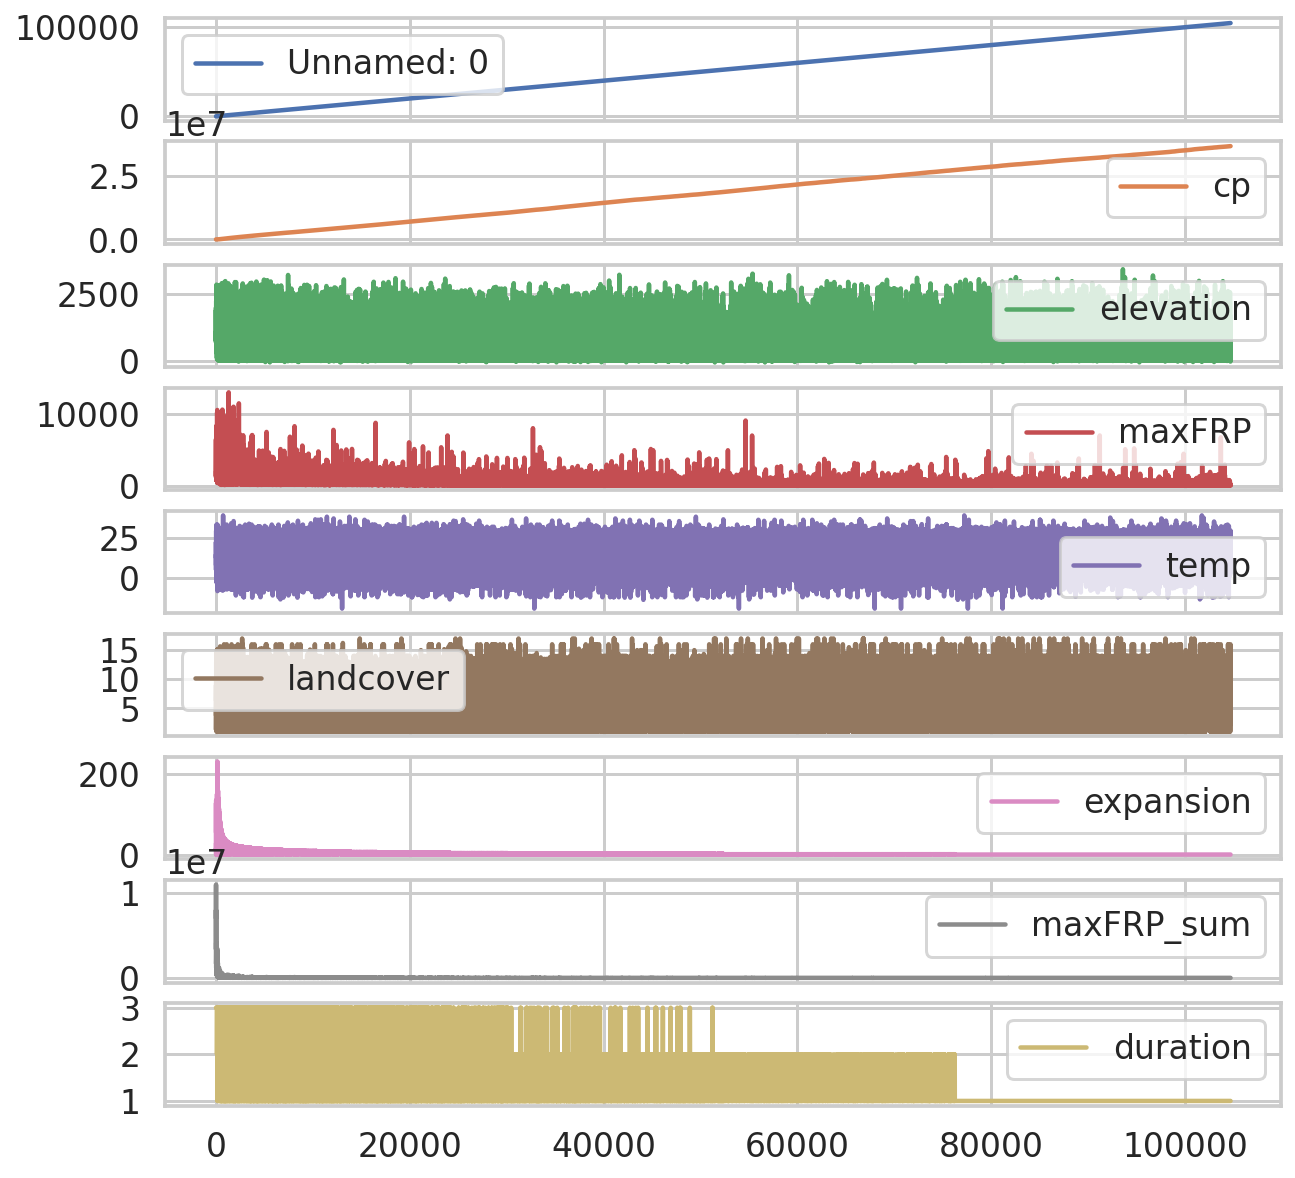

In [ ]:
working_data.plot(subplots=True, figsize=(10, 10), sharex=False, sharey=False)
plt.show()